### QLD Votes 2020

A series of hextile plots which look at the recent swings in the Queensland state elections. 

In [53]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle
import collections

In [54]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

In [55]:
# some seats have changed name prior to 2017
# note that hill and macalister are not officially replacements for dalrymple and albert, but there is a lot of overlap
namechanges = {'cooper':'ashgrove', 'scenic rim': 'beaudesert','mcconnel': 'brisbane central','oodgeroo': 'cleveland',\
               'maiwar': 'indooroopilly', 'kurwongbah': 'kallangur','traeger': 'mount isa', 'toohey': 'sunnybank',\
               'miller': 'yeerongpilly', 'hill':'dalrymple', 'macalister': 'albert',}

namechangesrev = {v : k for k, v in namechanges.items()}

#abolished = ['mount coot-tha']  # there are others too, though we don't need to list any of themas they won't appear

newseats = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']

In [56]:
# a function to extract the relevant data fromeach election and transformit 

def electionSwingPrepper(year):
    yeardf = pd.read_pickle(f"./{year}_2PP_seats.pkl")
    yeardf = yeardf[['Seat','winning party', 'winning pc']]
    yeardf.rename(columns={'Seat': 'Seat', 'winning party': f'winning party {year}', 'winning pc': f'winning pc {year}'}, inplace=True)
    
    # replace NLP and LIB as LNP, blanks as IND
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace(['NPA','LIB'], "LNP")
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace('', 'IND')

    
    yeardf[f'winning pc {year}'] = pd.to_numeric(yeardf[f'winning pc {year}'], errors='coerce')
    
    
    # set the color 
    yeardf[f'color{year}'] = 'white'       # for blanks
    
    def colorPlotter(party,param1, param2, param3, c1, c2, c3):
    
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param1) & (yeardf[f'winning pc {year}'] <= param2) & (yeardf[f'winning party {year}'] == party), c1, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param2) & (yeardf[f'winning pc {year}'] <= param3) & (yeardf[f'winning party {year}'] == party), c2, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param3) & (yeardf[f'winning pc {year}'] <= 100) & (yeardf[f'winning party {year}'] == party), c3, yeardf[f'color{year}'])
        
    colorPlotter("ALP",50,55,60,"salmon", "tomato", "darkred")
    colorPlotter("LNP",50,55,60,"deepskyblue", "blue", "navy")
    colorPlotter("GRN",50,55,60,"springgreen", "springgreen", "springgreen")
    colorPlotter("KAP",50,55,60,"khaki", "khaki", "khaki")
    colorPlotter("ONP",50,55,60,"orange", "orange", "orange")
    colorPlotter("IND",50,55,60,"dimgrey", "dimgrey", "dimgrey")    

    # rename seats that need it
    yeardf.Seat = yeardf.Seat.replace(namechangesrev) 

    return yeardf

## 2017

Firstly, let's make a hextil showing the 2017 elections, showins "safe", "fairly safe" and "marginal" wins.

In [57]:
year = '2017'
yeardf = electionSwingPrepper(year)

In [58]:
swingdf = yeardf.merge(hex2020, how="left")
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y
0,algester,ALP,64.43,darkred,18.5,2.2
1,aspley,ALP,51.17,salmon,18.5,3.4
2,bancroft,ALP,56.21,tomato,17.0,3.7


([], <a list of 0 Text major ticklabel objects>)

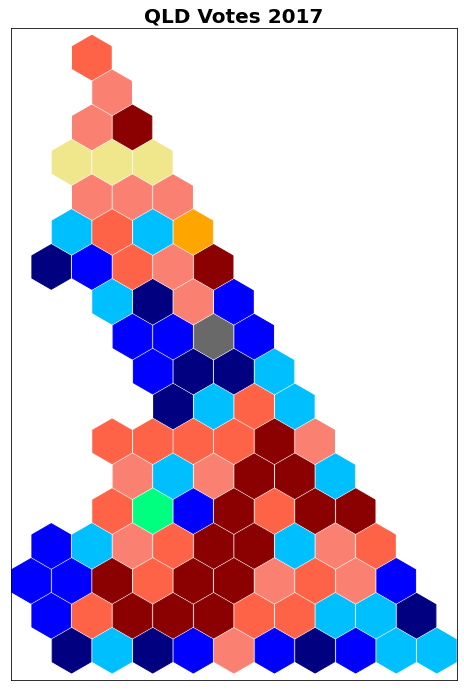

In [59]:
# map maker 

fig, ax = plt.subplots()
plt.title(f'QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf[f'color{year}'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

Key:
* Red = ALP (dark = safe, light = marginal)
* Blue = LNP (dark = safe, light = marginal)
* Orange = ONP
* Khaki = KAP
* Green = Green
* Grey = Independent

Note for following charts: abolished seats generally don't appear. In rare cases where there is significant overlap with a new seat they may be considered to be an extension of that seat (eg Tablelands does not show up as it was split evenly between three seats, but the new seat of hill includes voting from the older seat it had heavy overlap with)

# 2015 - 2017

I wanted to show how each seat had changed over time. The following hextile overlays each seats with a smaller hextile representing the previous result. 

In [60]:
year = '2015'
yeardf = electionSwingPrepper(year)

In [61]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

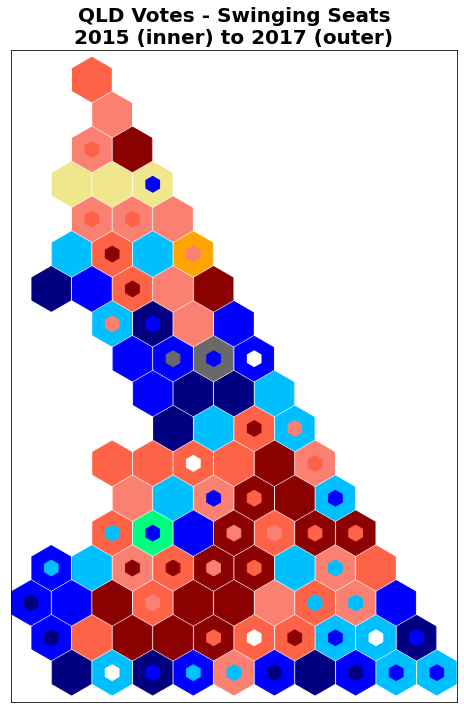

In [62]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### 2009 - 2017

Let's see how it looks if we include another 4 elections.

In [63]:
#gather data for 2012, 2009, 2006. 2004

year = '2012'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [64]:
year = '2009'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [65]:
year = '2006'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [66]:
year = '2004'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,darkred,ALP,67.97,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,...,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon,ALP,54.32,salmon
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

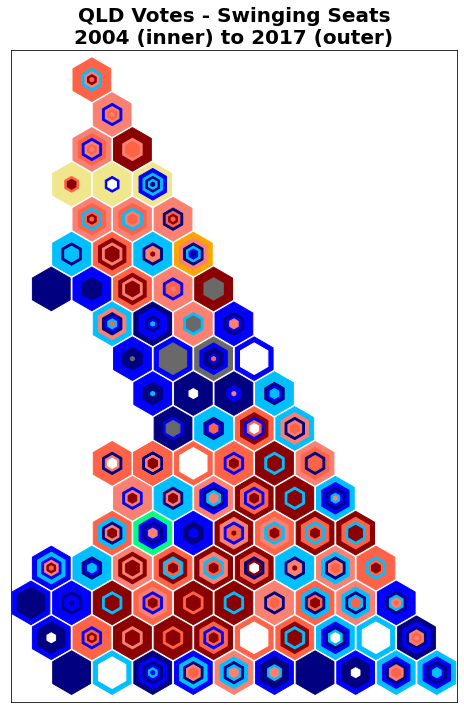

In [67]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1900, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

A 'tree rings' version makes the business of all this data a bit easier on the eye.

([], <a list of 0 Text major ticklabel objects>)

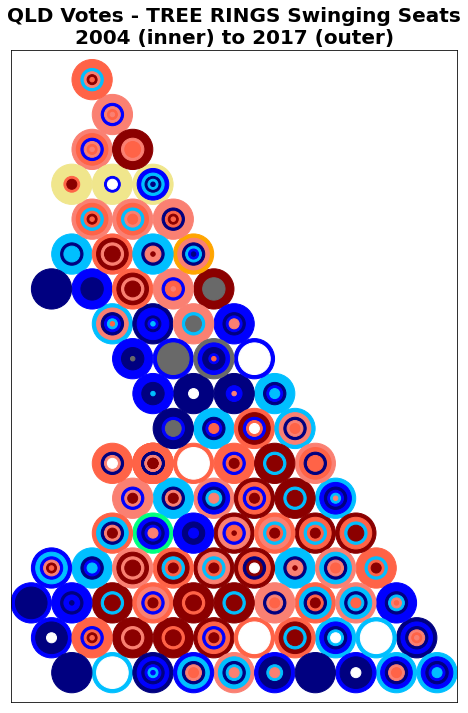

In [68]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - TREE RINGS Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

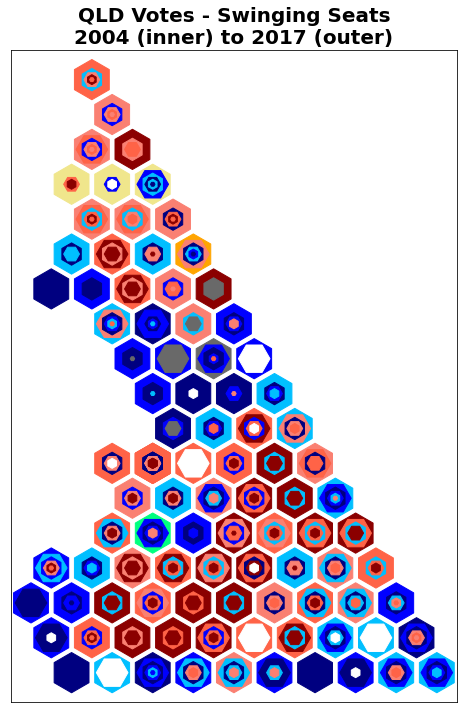

In [69]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SEATS CHANGING HANDS VERSION

In this version, it only matters who won the seat, not how much by.

In [70]:
# neutralize some of the colors 

def colorUpdater(year):
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'salmon', 'tomato', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'darkred', 'tomato', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'navy', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'deepskyblue', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'lightsteelblue', 'blue', swingdf[f'color{year}'])
    
colorUpdater('2017')
colorUpdater('2015')
colorUpdater('2012')
colorUpdater('2009')
colorUpdater('2006')
colorUpdater('2004')

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,tomato,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,tomato,ALP,67.97,tomato
1,aspley,ALP,51.17,tomato,18.5,3.4,LNP,55.17,blue,LNP,...,blue,LNP,54.46,blue,ALP,54.61,tomato,ALP,54.32,tomato
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

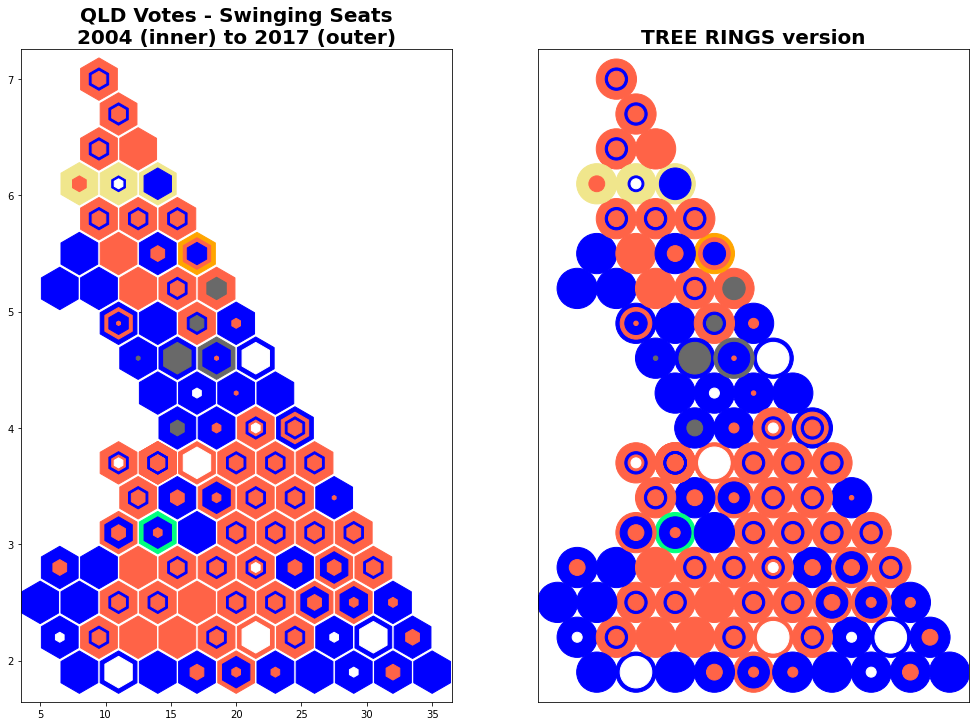

In [77]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1]})

# hextiles version

ax[0].set_title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1800, c=swingdf['color2017'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2004'])


# tree rings version

ax[1].set_title(f'TREE RINGS version', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (17, 12) 
plt.xticks([])
plt.yticks([])

With less information, the data is easier to read. The tree rings version also works well (esp if you have a 70s aesthietic). The trees rings is a nice metaphorical way of thinking about this data as well.

What they both highlight is the anomaly that was 2012 - the blue ring inide the red seats - when Labor suffered a landlisde defeat. It was a one off. As the version of this plot that excludes that vote shows, seats in Qld have been fairly stable. 

([], <a list of 0 Text major ticklabel objects>)

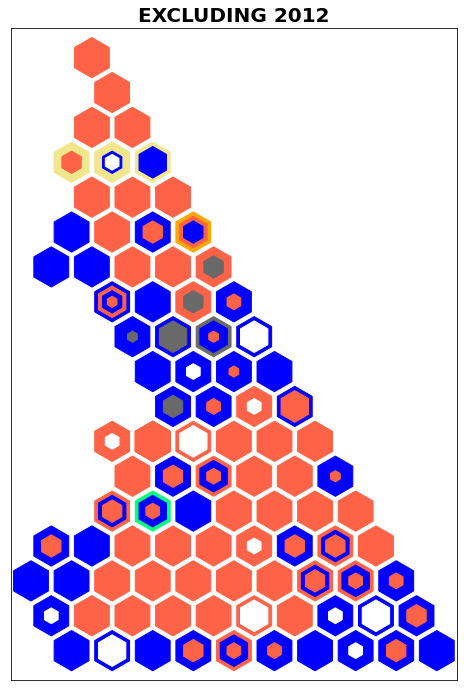

In [79]:
# excluding 2012 - which seems like an anomaly

fig, ax = plt.subplots()
plt.title(f'EXCLUDING 2012', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])
#ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2009'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2006'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

# WINNINGEST SEATS

In [94]:
freqdf = swingdf[['Seat','winning party 2017','winning party 2015','winning party 2012','winning party 2009','winning party 2006','winning party 2004']]

In [131]:

# find out how many times each party has held the seats

ALPall = []
ALPpc = []
LNPall = []
LNPpc = []
seatsum = []
for index, rows in freqdf.iterrows():
    x = rows.values
    y = collections.Counter(x)
    yALP = y['ALP']
    yLNP = y['LNP']
    yIND = y['IND']
    yONP = y['ONP']
    yKAP = y['KAP']
    yGRN = y['GRN']
    ySUM = yALP + yLNP + yIND + yONP + yKAP + yGRN
    yALPpc = round(yALP/ySUM,2)
    yLNPpc = round(yLNP/ySUM,2)
    ALPall.append(yALP)
    ALPpc.append(yALPpc)
    LNPall.append(yLNP)
    LNPpc.append(yLNPpc)
    seatsum.append(ySUM)

In [136]:
# setting ALP colors

def colorScaler(n): 
    
    if n < 0.4:
        R = 1
        B = 0.6 - n
        G = 0.6 - n
        
    else:
        R = 1 - (n - 0.4)
        B = 0.1
        G = 0.1
        
    c = R,G,B
    
    return c

clist = []
for n in ALPpc:
    c = colorScaler(n)
    clist.append(c)
    
# setting text colors

def colorScalerForText(n): 
    
    R = 1 - ((1 - (n ** .5)) / 5)
    B = 1 - ((1 - (n ** .5)) / 5)
    G = 1 - ((1 - (n ** .5)) / 5)
    
    t = R,G,B
    return t

tlist = []
for n in ALPpc:
    t = colorScalerForText(n)
    tlist.append(t)
    
len(clist)

96

In [147]:
# setting LNP colors

def colorScaler(n): 
    
    if n < 0.5:
        R = 1 - (n * 2)
        B = 1
        G = 1 - (n * 2)
        
    else:
        R = 0
        B = 1 - (n - 0.5)
        G = 0
        
    c = R,G,B
    
    return c

dlist = []
for n in LNPpc:
    d = colorScaler(n)
    dlist.append(d)
    
# setting text colors

def colorScalerForText(n): 
    
    R = 1 - ((1 - (n ** .5)) / 5)
    B = 1 - ((1 - (n ** .5)) / 5)
    G = 1 - ((1 - (n ** .5)) / 5)
    
    t = R,G,B
    return t

vlist = []
for n in LNPpc:
    v = colorScalerForText(n)
    vlist.append(t)

In [158]:
freqdf = freqdf.copy()                 # this stops the annoying error message
freqdf['seatsum'] = seatsum
freqdf['ALPpc'] = ALPpc
freqdf['ALPall'] = ALPall
freqdf['LNPpc'] = LNPpc
freqdf['LNPall'] = LNPall
freqdf['colorALP'] = clist
freqdf['colortextALP'] = tlist
freqdf['colorLNP'] = dlist
freqdf['colortextLNP'] = vlist

freqdf['colorALP'] = np.where(freqdf['ALPall'] == 0, 'lightsteelblue',freqdf['colorALP'])
freqdf['colorLNP'] = np.where(freqdf['LNPall'] == 0, 'wheat',freqdf['colorLNP'])
freqdf['colortextALP'] = np.where(freqdf['ALPall'] == 0, 'grey',freqdf['colortextALP'])

freqdf = freqdf.merge(hex2020, how="left")

freqdf.head(2)

,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004,ALPpc,ALPall,seatsum,colorALP,colortextALP,x,y,LNPpc,LNPall,colorLNP,colortextLNP
0,algester,ALP,ALP,LNP,ALP,ALP,ALP,0.83,5,6,"(0.5700000000000001, 0.1, 0.1)","(0.9822086715828859, 0.9822086715828859, 0.982...",18.5,2.2,0.17,1,"(0.6599999999999999, 0.6599999999999999, 1)","(1.0, 1.0, 1.0)"
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP,0.50,3,6,"(0.9, 0.1, 0.1)","(0.9414213562373095, 0.9414213562373095, 0.941...",18.5,3.4,0.50,3,"(0, 0, 1.0)","(1.0, 1.0, 1.0)"


([], <a list of 0 Text major ticklabel objects>)

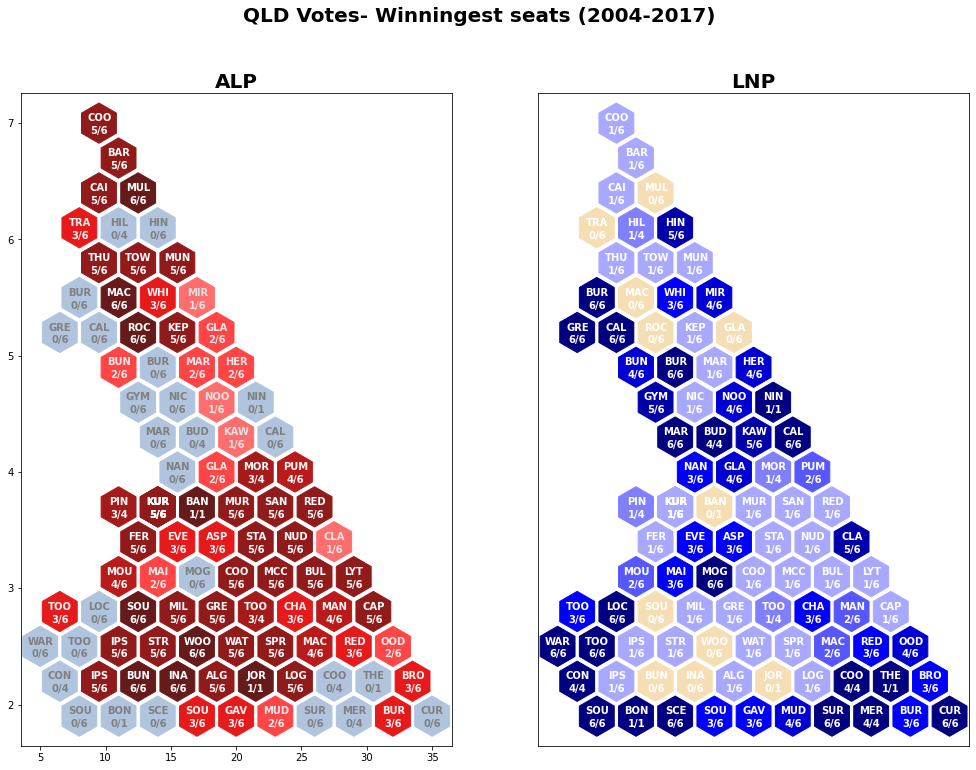

In [166]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1]})

plt.suptitle(f"QLD Votes- Winningest seats (2004-2017)", fontsize= 20, fontweight= 'bold')

ax[0].set_title(f"ALP", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=freqdf['colorALP'])
for i, point in freqdf.iterrows():
        text1 = f'{point["ALPall"]}/{point["seatsum"]}'
        ax[0].text(point['x']+0.025, point['y']-0.025, text1, ha="center", va="top", c=point['colortextALP'], weight="bold")
        ax[0].text(point['x']+0.025, point['y'], point['Seat'][0:3].upper(), ha="center", va="bottom",c=point['colortextALP'], weight="bold")
        
ax[1].set_title(f"LNP", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[1].scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=freqdf['colorLNP'])
for i, point in freqdf.iterrows():
        text1 = f'{point["LNPall"]}/{point["seatsum"]}'
        ax[1].text(point['x']+0.025, point['y']-0.025, text1, ha="center", va="top", c=point['colortextLNP'], weight="bold")
        ax[1].text(point['x']+0.025, point['y'], point['Seat'][0:3].upper(), ha="center", va="bottom",c=point['colortextLNP'], weight="bold")
        

plt.rcParams['figure.figsize'] = (17, 12) 
plt.xticks([])
plt.yticks([])

## SEATS THAT CHANGED HANDS IN 2017

In [175]:
swingdf['seat retained'] = np.where(swingdf['winning party 2017'] == swingdf['winning party 2015'],"Y","N")

swingdf[['Seat','winning party 2017','winning party 2015','seat retained']][0:10]

,Seat,winning party 2017,winning party 2015,seat retained
0,algester,ALP,ALP,Y
1,aspley,ALP,LNP,N
2,bancroft,ALP,NaN,N
3,barron river,ALP,ALP,Y
4,bonney,LNP,NaN,N
5,broadwater,LNP,LNP,Y
6,buderim,LNP,LNP,Y
7,bulimba,ALP,ALP,Y
8,bundaberg,LNP,ALP,N
9,bundamba,ALP,ALP,Y


In [202]:
t = []
for i, point in swingdf.iterrows(): 
    
    x = point['winning party 2017']
    y = point['winning party 2015']
    

    if x == y:
        color = 'lightgray'
        
    elif x == "ALP":
        color = 'tomato'
        
    elif x == "LNP":
        color = 'deepskyblue'
        
    elif x == "KAP":
        color = 'khaki'
        
    elif x == "GRN":
        color = 'springgreen'
        
    elif x == "ONP":
        color = 'orange'
        
       
    t.append(color)

swingdf['colorSR'] = t

In [203]:
swingdf[['Seat','winning party 2017','winning party 2015','seat retained', 'colorSR']]

,Seat,winning party 2017,winning party 2015,seat retained,colorSR
0,algester,ALP,ALP,Y,lightgray
1,aspley,ALP,LNP,N,tomato
2,bancroft,ALP,NaN,N,tomato
3,barron river,ALP,ALP,Y,lightgray
4,bonney,LNP,NaN,N,deepskyblue
...,...,...,...,...,...
91,traeger,KAP,KAP,Y,lightgray
92,warrego,LNP,LNP,Y,lightgray
93,waterford,ALP,ALP,Y,lightgray
94,whitsunday,LNP,LNP,Y,lightgray


In [204]:
swingdf = swingdf.merge(hex2020, how="left")

([], <a list of 0 Text major ticklabel objects>)

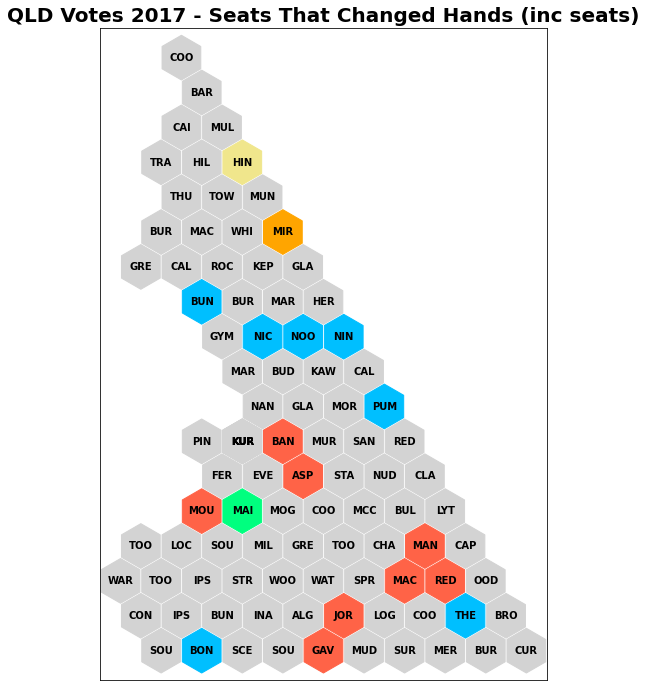

In [205]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Seats That Changed Hands (inc seats)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSR'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SWINGS TOWARDS LABOR

In [732]:
t = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        swingALP = '--'
        
    else:
        
        if point['winning party 2017'] == 'ALP':
            now = float(point['winning pc 2017'])
            
        else:
            now = 100.0 - float(point['winning pc 2017'])
                     
        if point['winning party 2015'] == 'ALP':
                then = float(point['winning pc 2015'])
        else:
                then = 100.0 - float(point['winning pc 2015'])
            
        swingALP = round(now - then,2)
                
    t.append(swingALP)

swingdf['swingALP'] = t

In [733]:
r = []

for i in t: 
        
    if i ==  '--':
        color = 'lightgrey'
                   
    elif i == 0:
        color = 'white'
        
    elif i > 8:
        color = 'darkred'
        
    elif i > 4:
        color = 'tomato'
        
    elif i > 0:
        color = 'salmon'
        
    elif i < -8:
        color = 'navy'
        
    elif i < -4:
        color = 'deepskyblue'
        
    elif i < 0:
        color = 'lightsteelblue'
       
    r.append(color)

swingdf['colorSwingALP'] = r

([], <a list of 0 Text major ticklabel objects>)

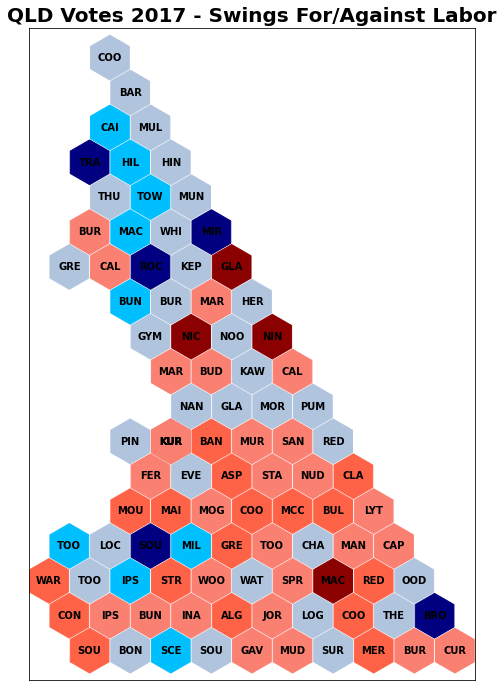

In [735]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swings For/Against Labor', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingALP'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])